In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import random

%matplotlib inline
#%matplotlib widget  

In [75]:
df = pd.read_excel('WorkPlaceSatisfactionSurveyData.xlsx')

## Tsekataan tyhjät kohdat

In [ ]:
df.isnull().sum()

## Rename the columns 

In [76]:
df.columns = ['number', 'gender', 'age', 'family', 'education', 'years_of_service', 'salary', 'sat_management', 'sat_colleagues', 'sat_workEnvironment', 'sat_salary', 'sat_tasks', 'healthCare', 'holidayCabin', 'gym', 'muscleCare']

## Dropataan turhat sarakkeet pois

In [77]:
df=df.drop(['number', 'gym', 'muscleCare', 'holidayCabin', 'healthCare'], axis=1)

In [ ]:
df.info()

In [ ]:
df.describe()

## Genderin ja agen yleiskatsaus

In [ ]:
df[['gender', 'age']].describe()
df1 = df[['gender', 'age']].describe()
df1 = df1.round(2)
df1

## Firman vanhimmat ja nuorimmat

In [ ]:
df.nlargest(n = 3, columns = 'age')

In [ ]:
df.nsmallest(n = 3, columns = 'age')

## Ikä-ääripäät

In [78]:
youngest_age = df['age'].min()
oldest_age = df['age'].max()

df22 = pd.DataFrame({'Age Category': ['Youngest', 'Oldest'], 'Age': [youngest_age, oldest_age]})
table = tabulate(df22, headers='keys', tablefmt='pretty', showindex=False)

print(table)

+--------------+-----+
| Age Category | Age |
+--------------+-----+
|   Youngest   | 20  |
|    Oldest    | 61  |
+--------------+-----+


## Luodaan ikäryhmät 

In [79]:
bins = [20, 30, 40, 50, 60, 70]

In [80]:
df['Age_groups'] = pd.cut(df['age'], bins = bins, right = False)

## Ikäryhmät määrinä ja prosenttiosuuksina

In [81]:
df2 = pd.crosstab(df['Age_groups'], 'Count')
df2.columns.name = ''
n = df2['Count'].sum()
df2['%'] = df2 / n * 100
decimal_places = 2
df2['%'] = df2['%'].round(decimal_places)
df2.loc['Total'] = df2.sum()

In [82]:
df2

,Count,%
Age_groups,,
"[20, 30)",17.0,20.73
"[30, 40)",30.0,36.59
"[40, 50)",23.0,28.05
"[50, 60)",11.0,13.41
"[60, 70)",1.0,1.22
Total,82.0,100.00


## Ikäryhmät histogrammeina...

In [ ]:
df['age'].hist(bins = bins, color = 'PaleVioletRed')
plt.xlabel('Age division as numbers')
plt.ylabel('Count, n=' + str(n))

In [ ]:
df['age'].hist(bins = bins, weights = np.ones(n) / n * 100, color = 'PaleVioletRed')
plt.xlabel('Age division as percentages')
plt.ylabel('%, n=' + str(n))

## Ikäryhmien miehet ja naiset taulukkoon

In [ ]:
df3 = pd.crosstab(df['Age_groups'], df['gender'])
df3.loc['Total'] = df3.sum() 
df3.columns = ['men', 'women']

In [ ]:
df3

## Bar chart sukupuolista ikäryhmittäin

In [ ]:
df3.plot.barh(legend = 'reverse', color=['SlateBlue', 'LightCoral'])

plt.xlabel('Sukupuolijakauma ikäryhmittäin')

plt.grid(axis = 'y')

## Ikäjakaumapiechart

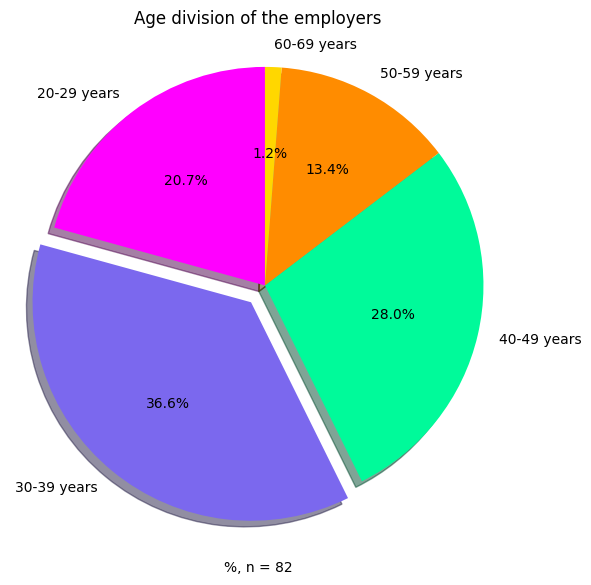

In [83]:
df4 = pd.crosstab(df['Age_groups'], 'Count')
df4.columns.name = ''
n = df4['Count'].sum()
df4['%'] = df4 / n * 100

labels = ['20-29 years', '30-39 years', '40-49 years', '50-59 years', '60-69 years']
percentages = df4['%']

explode = (0, 0.1, 0, 0, 0)
fig, ax = plt.subplots()
ax.pie(percentages, explode=explode, labels=labels, autopct='%1.1f%%',
       colors=['Fuchsia', 'MediumSlateBlue', 'MediumSpringGreen', 'DarkOrange', 'Gold'],
       shadow=True, startangle=90)

plt.title('Age division of the employers')
plt.subplots_adjust(top=1.2)
plt.axis('equal')
plt.xlabel('%, n = ' + str(df4['Count'].sum()))
plt.show()

In [86]:
df4

,Count,%
Age_groups,,
"[20, 30)",17,20.731707
"[30, 40)",30,36.585366
"[40, 50)",23,28.048780
"[50, 60)",11,13.414634
"[60, 70)",1,1.219512


## Sukupuolijakauma


In [84]:
df5=pd.crosstab(df['gender'], 'Count')
df5.index = ['Male', 'Female']
df5.columns.name = ''
#df5.loc['Total'] = df5.sum()

In [85]:
df5

,Count
Male,63
Female,19


## Genderpie

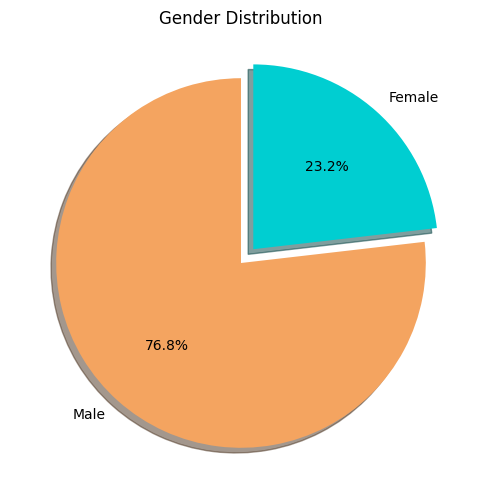

In [87]:
plt.figure(figsize=(6, 6))
explode = (0, 0.1)
plt.pie(df5['Count'], labels=df5.index, explode=explode, autopct='%1.1f%%', 
        colors=['SandyBrown', 'DarkTurquoise'],
        shadow=True, startangle=90)
plt.title('Gender Distribution')
plt.show()

## ...ja vielä prosentteina

In [88]:
df6=pd.crosstab(df['gender'], 'Count')
df6['%'] = df6['Count'] / df6['Count'].sum() * 100
decimal_places = 1
df6['%'] = df6['%'].round(decimal_places)
df6.index = ['Male', 'Female']
df6.loc['Total'] = df6.sum()

In [89]:
df6

col_0,Count,%
Male,63.0,76.8
Female,19.0,23.2
Total,82.0,100.0


(array([0, 1]), [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

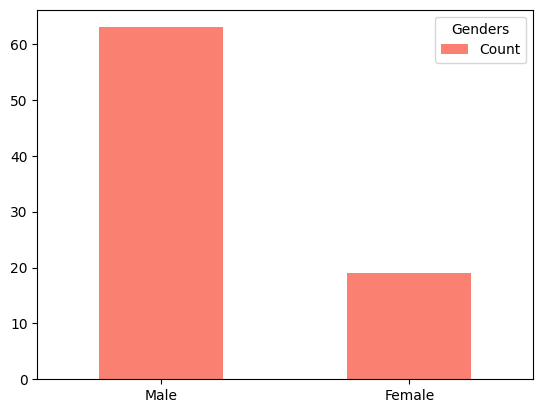

In [90]:
df5.plot.bar(color = 'Salmon', legend = 'reverse')
plt.legend(['Count'], title='Genders') 
plt.xticks(rotation=360, horizontalalignment="center") 

## Ikäryhmä bar chart

In [ ]:
df7=pd.crosstab(df['Age_groups'], 'Count')
df7.index = ['20-29', '30-39', '40-49', '50-59', '60-69']

In [ ]:
df7.plot.bar(color = 'DarkOrchid', legend = reversed)
plt.legend(['count'], title='Age_groups') 
plt.xticks(rotation=360, horizontalalignment="center") 

## Ikäryhmät ja sukupuolet stacked bar chartissa

C:\Users\Erja\AppData\Local\Temp\ipykernel_16412\3333066544.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['Age_groups', 'gender']).size().unstack(fill_value=0)


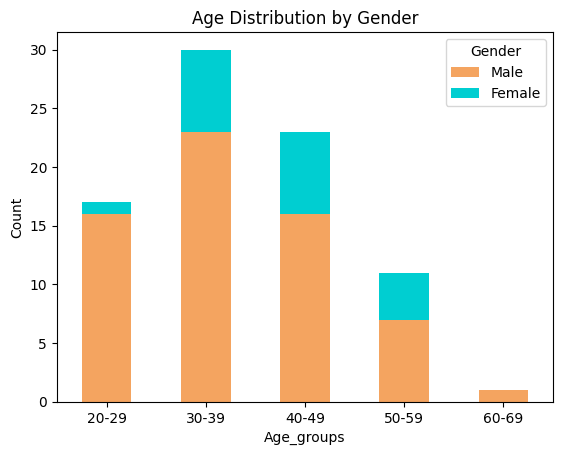

In [91]:
grouped = df.groupby(['Age_groups', 'gender']).size().unstack(fill_value=0)
grouped.index = ['20-29', '30-39', '40-49', '50-59', '60-69']

grouped.plot(kind='bar', stacked=True, color=['SandyBrown', 'DarkTurquoise'])

plt.xlabel('Age_groups')
plt.ylabel('Count')
plt.title('Age Distribution by Gender')
plt.legend(['Male', 'Female'], title='Gender')
plt.xticks(rotation=360, horizontalalignment="center") 

plt.show()

## Tyytyväisyys työnjohtoon sukupuolittain

In [ ]:
df8 = pd.crosstab(df['sat_workEnvironment'], df['gender'])
#df8.loc['Total'] = df8.sum() 
df8.index = ['very unsatisfied', 'unsatisfied', 'neutral', 'satisfied', 'very satisfied']
df8.columns = ['men', 'women']

In [ ]:
df8

In [ ]:
df8.plot.barh(legend = 'reverse', color=['Teal', 'Tomato'])

plt.xlabel('Tyytyväisyys työnjohtoon sukupuolittain')

plt.grid(axis = 'y')

In [ ]:
from scipy.stats import chi2_contingency
chi2_contingency(df8)

## Palkkatyytyväisyys sukupuolittain numeroina

In [92]:
df9 = pd.crosstab(df['sat_salary'], df['gender'])
df9.index = ['very unsatisfied', 'unsatisfied', 'neutral', 'satisfied', 'very satisfied']
df9.columns = ['men', 'women']
#df9.loc['Total'] = df9.sum() 

In [93]:
df9

,men,women
very unsatisfied,32,1
unsatisfied,12,7
neutral,12,7
satisfied,7,3
very satisfied,0,1


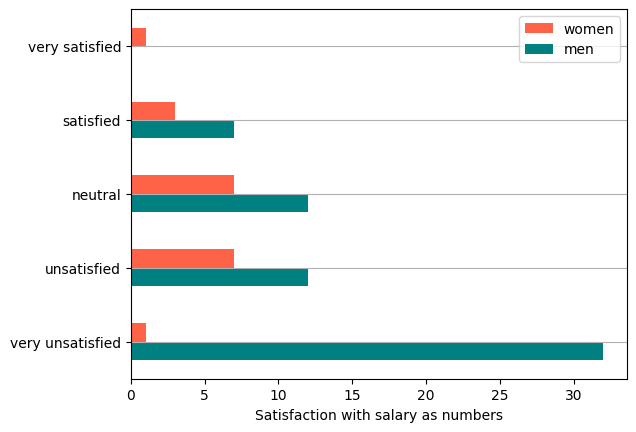

In [94]:
df9.plot.barh(legend = 'reverse', color=['Teal', 'Tomato'])
plt.xlabel('Satisfaction with salary as numbers')
plt.grid(axis = 'y')

## Palkkatyytyväisyys sukupuolittain prosentteina

In [95]:
total_men = df9['men'].sum()
total_women = df9['women'].sum()

df15 = pd.crosstab(df['sat_salary'], df['gender'], normalize = 'columns') * 100
df15 = df15.round(2)

df15 = df9.copy()
df15['men'] = ((df15['men'] / total_men) * 100).round(2)
df15['women'] = ((df15['women'] / total_women) * 100).round(2)

df15.index = ['very unsatisfied', 'unsatisfied', 'neutral', 'satisfied', 'very satisfied']
#df15.loc['Total'] = df15.sum() 

df15

,men,women
very unsatisfied,50.79,5.26
unsatisfied,19.05,36.84
neutral,19.05,36.84
satisfied,11.11,15.79
very satisfied,0.00,5.26


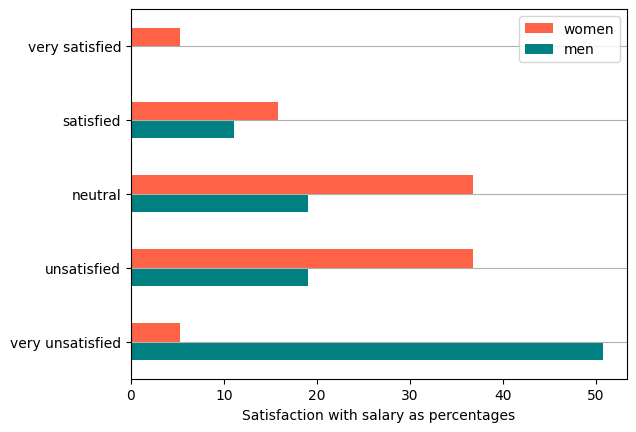

In [96]:
df15.plot.barh(legend = 'reverse', color=['Teal', 'Tomato'])
plt.xlabel('Satisfaction with salary as percentages')
plt.grid(axis = 'y')

In [97]:
chi2_contingency(df9)

Chi2ContingencyResult(statistic=15.086918785533744, pvalue=0.00452429558455757, dof=4, expected_freq=array([[25.35365854,  7.64634146],
       [14.59756098,  4.40243902],
       [14.59756098,  4.40243902],
       [ 7.68292683,  2.31707317],
       [ 0.76829268,  0.23170732]]))

## Tyytyväisyys työtehtäviin sukupuolittain

In [ ]:
df10 = pd.crosstab(df['sat_tasks'], df['gender'])
df10.index = ['very unsatisfied', 'unsatisfied', 'neutral', 'satisfied', 'very satisfied']
df10.columns = ['men', 'women']

In [ ]:
df10

In [ ]:
df10.plot.barh(legend = 'reverse', color=['Teal', 'Tomato'])

plt.xlabel('Tyytyväisyys työtehtäviin sukupuolittain')

plt.grid(axis = 'y')

In [ ]:
chi2_contingency(df10)

## Ikäryhmien tyytyväisyys palkkaan

In [ ]:
#df11 = pd.crosstab(df['sat_salary'], df['Age_groups'])
df11 = pd.crosstab(df['sat_salary'], df['Age_groups'], normalize = 'columns') * 100
df11 = df11.round(2)

df11.index = ['very unsatisfied', 'unsatisfied', 'neutral', 'satisfied', 'very satisfied']
df11.columns = ['20-30','30-40','40-50','50-60','60-70']
#df11.loc['Total'] = df11.sum() 

In [ ]:
df11

In [ ]:
#df11.plot.barh(legend = False)
df11.plot.barh(legend = True)

plt.title('Satisfaction with salary in different age groups')
plt.xlabel('Percentages')

In [ ]:
chi2_contingency(df11)

## Ikäryhmien tyytyväisyys työnjohtoon

In [98]:
df12 = pd.crosstab(df['sat_management'], df['Age_groups'], normalize = 'columns') * 100
df12 = df12.round(2)

df12.index = ['very unsatisfied', 'unsatisfied', 'neutral', 'satisfied', 'very satisfied']
df12.columns = ['20-30','30-40','40-50','50-60','60-70']
#df12.loc['Total'] = df12.sum() 


In [99]:
df12

,20-30,30-40,40-50,50-60,60-70
very unsatisfied,5.88,13.33,8.70,0.00,0.0
unsatisfied,23.53,13.33,30.43,0.00,100.0
neutral,35.29,43.33,30.43,36.36,0.0
satisfied,29.41,26.67,21.74,45.45,0.0
very satisfied,5.88,3.33,8.70,18.18,0.0


Text(0.5, 0, 'Percentages')

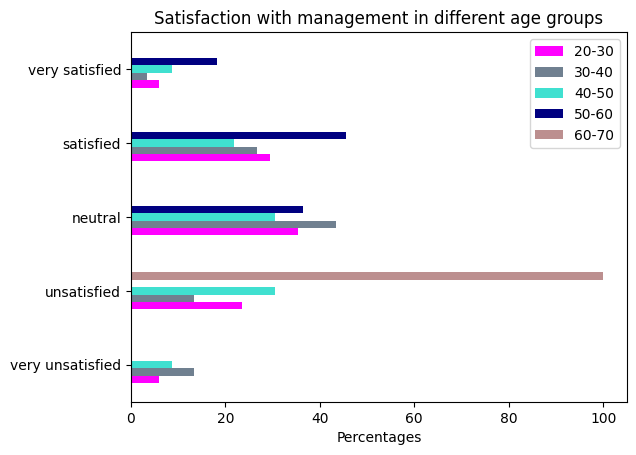

In [100]:
colors=['Fuchsia', 'SlateGrey', 'Turquoise', 'Navy', 'RosyBrown']

df12.plot.barh(legend = True, color=colors)

plt.title('Satisfaction with management in different age groups')
plt.xlabel('Percentages')

In [101]:
chi2_contingency(df12)

Chi2ContingencyResult(statistic=314.20201166339393, pvalue=2.8999104193007767e-57, dof=16, expected_freq=array([[ 5.58177671,  5.58177671,  5.58233494,  5.58177671,  5.58233494],
       [33.4566616 , 33.4566616 , 33.4600076 , 33.4566616 , 33.4600076 ],
       [29.08083665, 29.08083665, 29.08374502, 29.08083665, 29.08374502],
       [24.65301378, 24.65301378, 24.65547933, 24.65301378, 24.65547933],
       [ 7.21771126,  7.21771126,  7.21843311,  7.21771126,  7.21843311]]))

In [ ]:
df13 = pd.crosstab(df['sat_workEnvironment'], df['Age_groups'])
df13.index = ['very unsatisfied', 'unsatisfied', 'neutral', 'satisfied', 'very satisfied']
df13.columns = ['20-30','30-40','40-50','50-60','60-70']

In [ ]:
df13

In [ ]:
df13.plot.barh(legend = True)
plt.title('Tyytyväisyys työympäristöön ikäryhmittäin')

In [ ]:
chi2_contingency(df13)

## Lopuksi 4 extra-asiaa tehtävänantoon liittyen 

### 1. Give an example how to use list comprehension in Python

In [102]:
listOfCities = ["helsinki", "cairo", "lisbon", "kampala", "lusaka"]
newlist = [n for n in listOfCities if "k" in n]

print(newlist)

['helsinki', 'kampala', 'lusaka']


### 2. Explain what are the keyword arguments in Python

In [103]:
# kwarg = providing a name to a variable as it is passed into the function. Kwargs can be in any order. 

def cats(kwarg2, kwarg3, kwarg1):
  print("The oldest cat is " + kwarg1 + ".")

cats(kwarg3 = "Kielo", kwarg1 = "Jouko", kwarg2 = "Astrid")

The oldest cat is Jouko.


### 3. Give an example how to use slicing (that [:] thing) for WorkPlaceSatisfactionSurveyData

In [104]:
ageBins = [20, 30, 40, 50, 60, 70]

In [105]:
# Annetut arvot indikoivat parametrit "start, stop, and step".
# 1. start: aloitusindeksi, included
# 2. stop: lopetusindeksi, excluded
# 3. step: askeleen koko, eli kuinka monein välein poimitaan
ageBins[1:4:2]

[30, 50]

In [106]:
# Annetut arvot indikoivat parametrit "start, stop, and step".
# 1. start: negatiivisen arvon vuoksi edetään listan lopusta
# 2. stop: listan pituus negatiivisena, eli lopusta alkuun
# 3. step: askeleen pituus, eli kuinka monein välein poimitaan, takaperin
ageBins[-2:-len(ageBins):-2]

[60, 40]

### 4. Show that your Triangle example is working for you

In [107]:
def calculate_points(n=100, n_vertices=3):

    x_points=[0]
    y_points=[0]
    
    x_vertices=[np.sin((2*k*np.pi)/n_vertices) for k in range(0,n_vertices)]
    y_vertices=[np.cos((2*k*np.pi)/n_vertices) for k in range(0,n_vertices)]
    
    for item in range(0,n):
        r=random.randint(1, n_vertices)-1
        x_points.append((x_vertices[r]+x_points[-1])/2)
        y_points.append((y_vertices[r]+y_points[-1])/2)

    plt.figure(figsize=(6, 6))
    plt.axis('equal')
    plt.scatter(x_points, y_points, color='k', s=.001);
    plt.show()

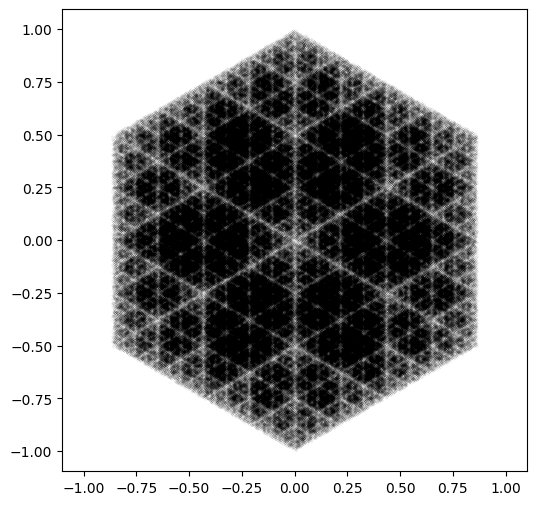

In [108]:
calculate_points(n=1000000, n_vertices=6);

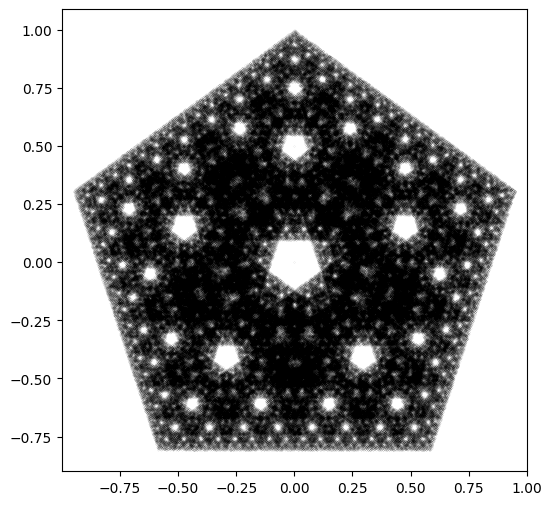

In [109]:
calculate_points(n=1000000, n_vertices=5);

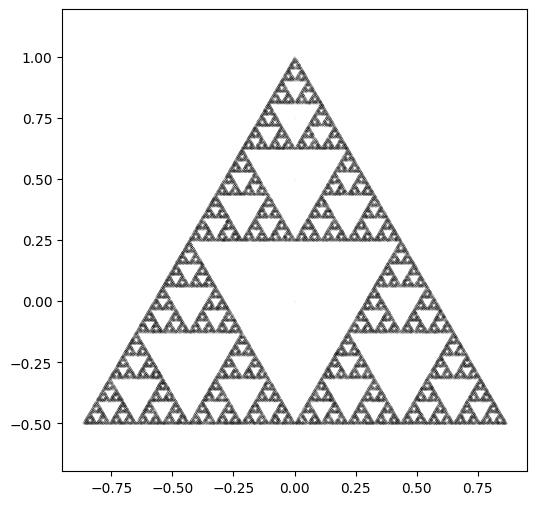

In [110]:
calculate_points(n=100000, n_vertices=3);